**Stake Holder**

**Platform/Perusahaan Jual Beli Mobil (Syarah.com)**

- *Value Proposition*: Meningkatkan Kepercayaan (Trust) dan Transparansi. Dengan adanya *tool* prediksi harga, *platform* tidak lagi terlihat seperti "pasar liar", melainkan menjadi sumber informasi yang terpercaya. Ini akan meningkatkan jumlah *listing* dan transaksi.

**Problem Statement**

Salah satu tantangan untuk perusahaan yang bergerak dibidang jual beli mobil bekas adalah harga mobil yang dinaikan oleh penjualnya padahal kondisi barangnya tidak sesuai. Selain itu juga ada permasalahan penjual kesulitan untuk menentukan harga jual yang pas untuk mobilnya.

**Objective**

Berdasarkan masalah ini, pembelian mobil bekas dan distributor membutuhkan *"tool"* yang dapat memprediksi harga mobil. Alat ini membantu penjual menentukan harga jual yang kompetitif dan memverifikasi keadilan harga pembeli. Ada perbedaan dalam karakteristik mobil, seperti merek, jarak tempuh lama (jarak tempuh) tahun produksi, dan varian (opsional), yang meningkatkan keakuratan prediksi harga.

Untuk bisnis (platform/dealer), *tool prediction* yang adil ini dapat meningkatkan kepercayaan dan jumlah pengguna (baik penjual maupun pembeli). Semakin banyak transaksi pada *platform*, semakin besar pendapatan perusahaan yang dicapai dari komite penjualan atau biaya iklan.

**Analytic Approach**

menganalisis data untuk menemukan pola dari fitur-fitur yang membedakan satu mobil dengan yang lainnya.

Selanjutnya, kita akan membangun model regresi yang akan membantu perusahaan menyediakan *'tool'* prediksi harga untuk mobil bekas yang baru masuk ke dalam daftar penjualan (*listing*).

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah *RMSE*, *MAE*, dan *MAPE,* di mana *RMSE* adalah nilai rataan akar kuadrat dari *error*, *MAE* adalah rataan nilai absolut dari *error*, sedangkan *MAPE* adalah rataan persentase *error* yang dihasilkan oleh model regresi. Semakin kecil nilai *RMSE*, *MAE*, dan *MAPE* yang dihasilkan, berarti model semakin akurat dalam memprediksi harga mobil bekas sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai *R-squared* atau *adj. R-squared* jika model yang nanti terpilih sebagai final model adalah *linear model*. Nilai *R-squared* digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varian keseluruhan data. Semakin mendekati 1, maka semakin *fit* juga modelnya terhadap data observasi. Namun, metrik ini tidak *valid* untuk *non-linear model*.

In [65]:
# Import all libraries needed for the project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv('E:\\PURWADHIKA\\Capstone module 3\\data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## EDA

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [68]:
# Mengecek jumlah data yang memiliki nilai NaN pada setiap kolom
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [69]:
df.describe(include='all')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,5624,5624,5624,5624,5624,5624,5624.000000,5624.000000,5.624000e+03,5624,5624.000000
unique,347,27,58,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,269,2272,1431,4875,4188,2233,NaN,NaN,NaN,3828,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.101885,3.295430,1.509234e+05,NaN,53074.058144
std,NaN,NaN,NaN,NaN,NaN,NaN,5.791606,1.515108,3.828360e+05,NaN,70155.340614
min,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,1.000000,1.000000e+02,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.800000e+04,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,1.030000e+05,NaN,36500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.500000,1.960000e+05,NaN,72932.500000


- Kolom

In [70]:
# categorical features
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

In [71]:
# numeric features
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['charges']))]
num_features

['Year', 'Engine_Size', 'Mileage', 'Negotiable', 'Price']

In [72]:
# mengecek nilai unique pada setiap categorical feature
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in Type:  347
Unique values:  ['Corolla' 'Yukon' 'Range Rover' 'Optima' 'FJ' 'CX3' 'Cayenne S' 'Sonata'
 'Avalon' 'LS' 'C300' 'Land Cruiser' 'Hilux' 'Tucson' 'Caprice' 'Sunny'
 'Pajero' 'Azera' 'Focus' '5' 'Spark' 'Camry' 'Pathfinder' 'Accent' 'ML'
 'Tahoe' 'Yaris' 'Suburban' 'A' 'Altima' 'Traverse' 'Expedition'
 'Senta fe' 'Liberty' '3' 'X' 'Elantra' 'Land Cruiser Pickup' 'VTC'
 'Malibu' 'The 5' 'A8' 'Patrol' 'Grand Cherokee' 'SL' 'Previa' 'SEL'
 'Aveo' 'MKZ' 'Victoria' 'Datsun' 'Flex' 'GLC' 'ES' 'Edge' '6' 'Escalade'
 'Innova' 'Navara' 'H1' 'G80' 'Carnival' 'Symbol' 'Camaro' 'Accord'
 'Avanza' 'Land Cruiser 70' 'Taurus' 'C5700' 'Impala' 'Optra' 'S' 'Other'
 'Cerato' 'Furniture' 'Murano' 'Explorer' 'LX' 'Pick up' 'Charger' 'H6'
 'BT-50' 'Hiace' 'Ranger' 'Fusion' 'Rav4' 'Ciocca' 'CX9' 'Kona' 'Sentra'
 'Sierra' 'Durango' 'CT-S' 'Sylvian Bus' 'Navigator' 'Opirus' 'Marquis'
 'The 7' 'FX' 'Creta' 'D-MAX' 'CS35' 'The 3' 'Dyna' 'GLE' 'Sedona'
 'Prestige' 'CLA' 'Lumina' 'V

- Price persebaran

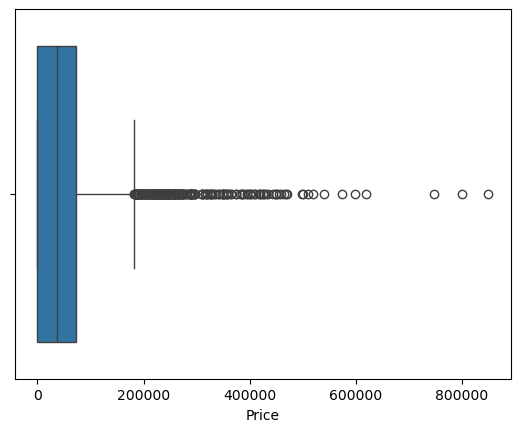

In [73]:
sns.boxplot(x='Price', data=df);

- Korelasi

In [74]:
df[num_features].corr()['Price']

Year           0.293681
Engine_Size    0.151973
Mileage       -0.095368
Negotiable    -0.518236
Price          1.000000
Name: Price, dtype: float64

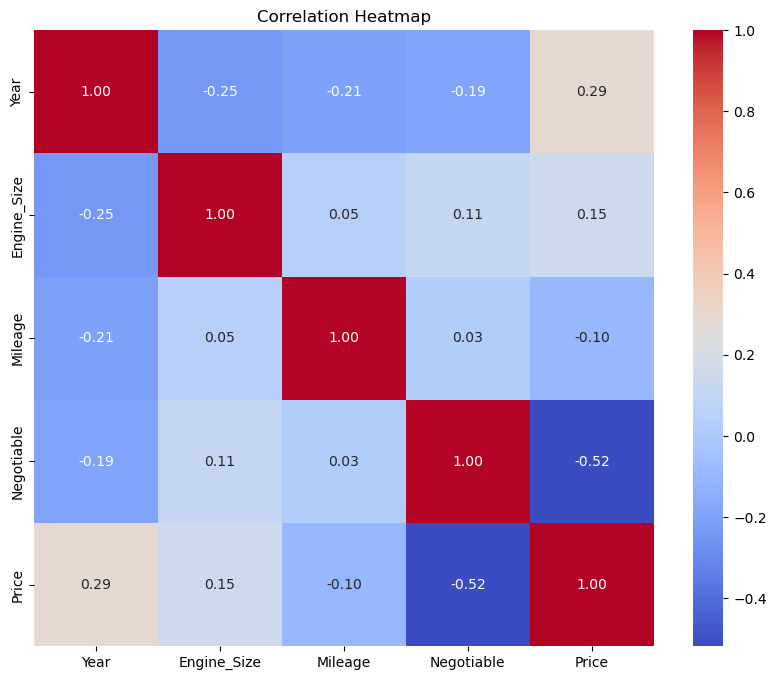

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

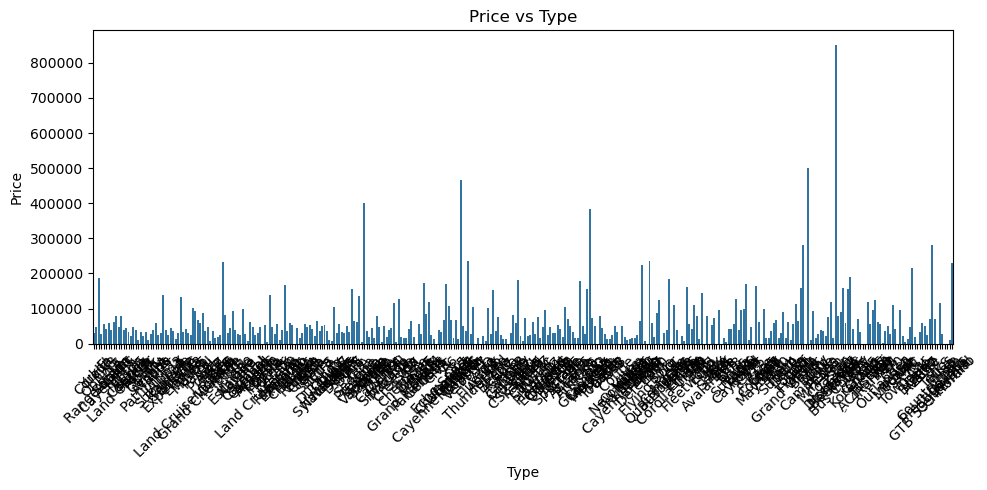

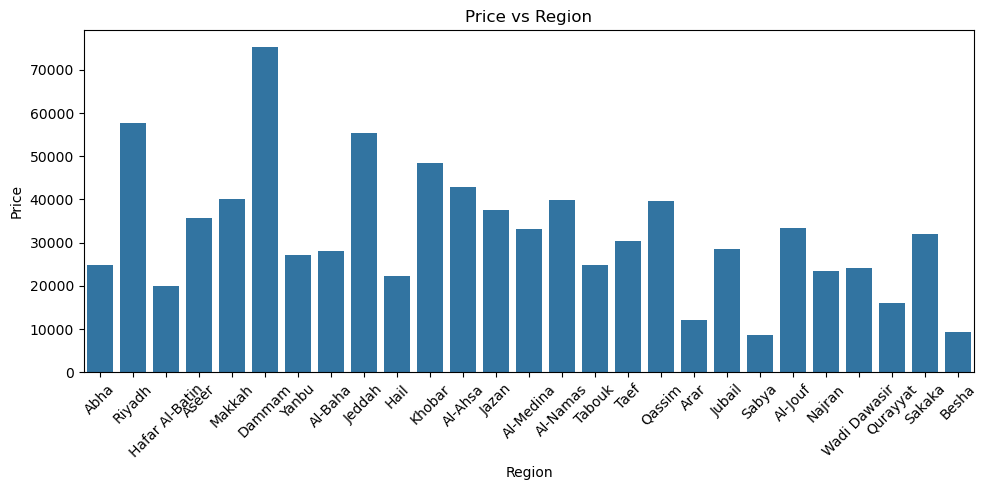

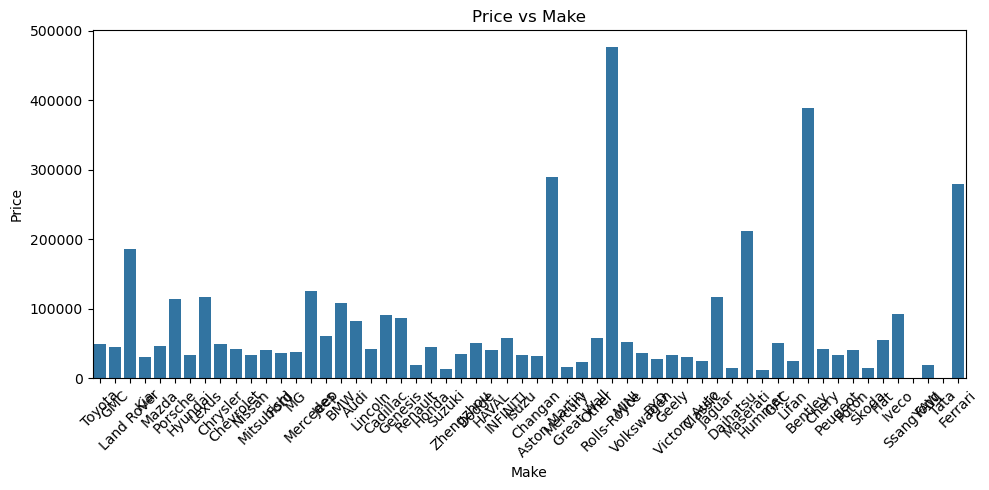

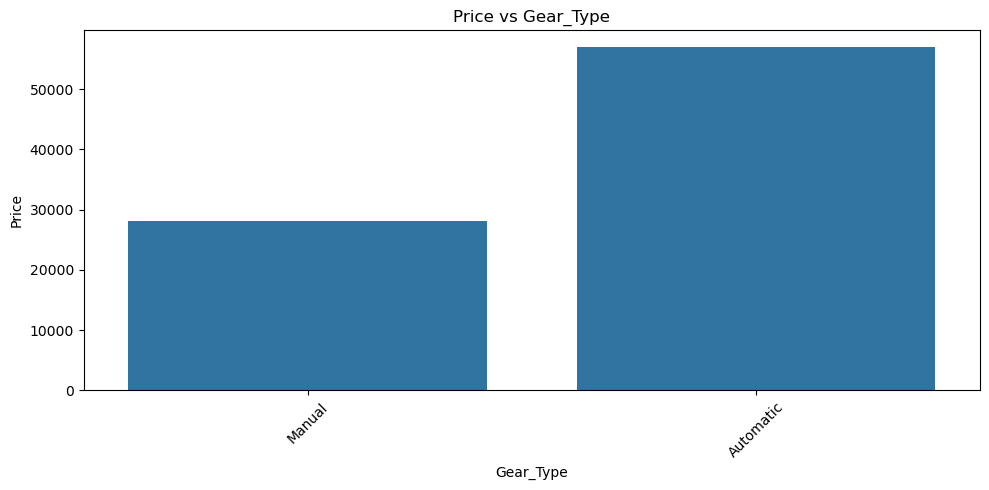

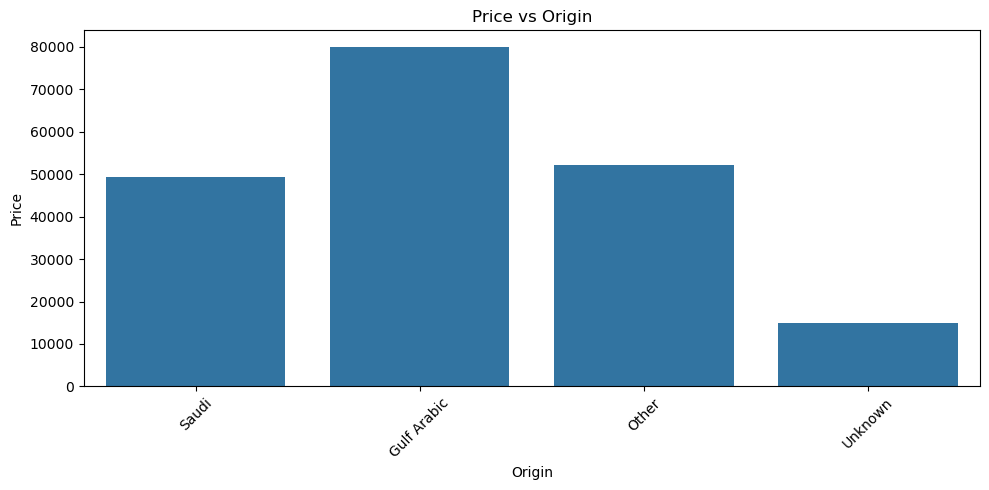

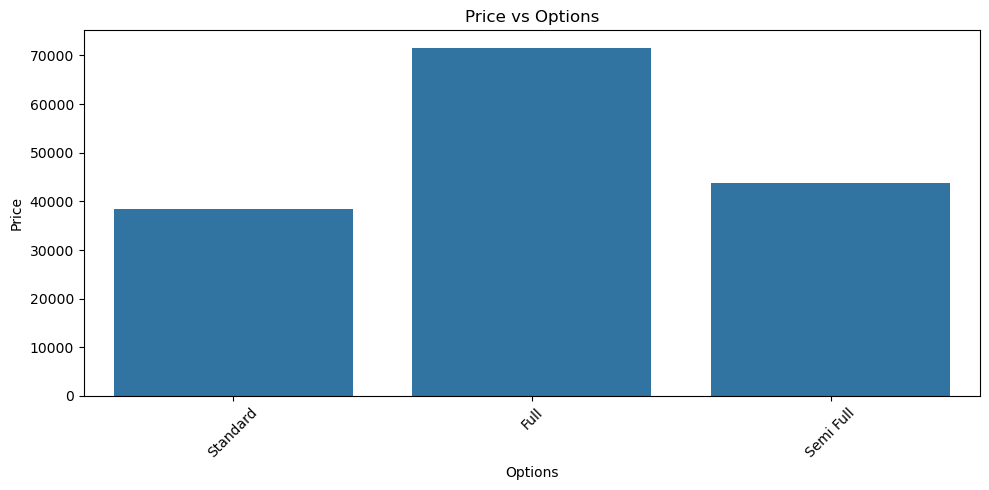

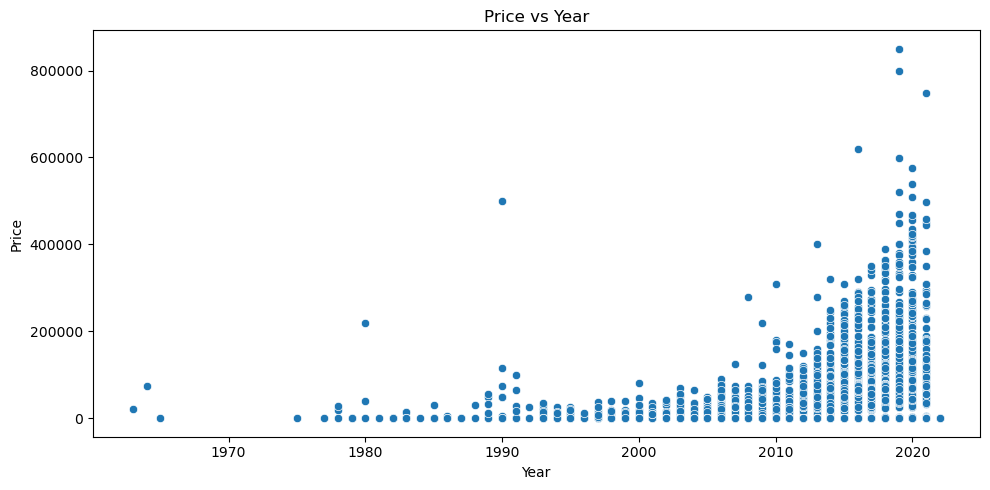

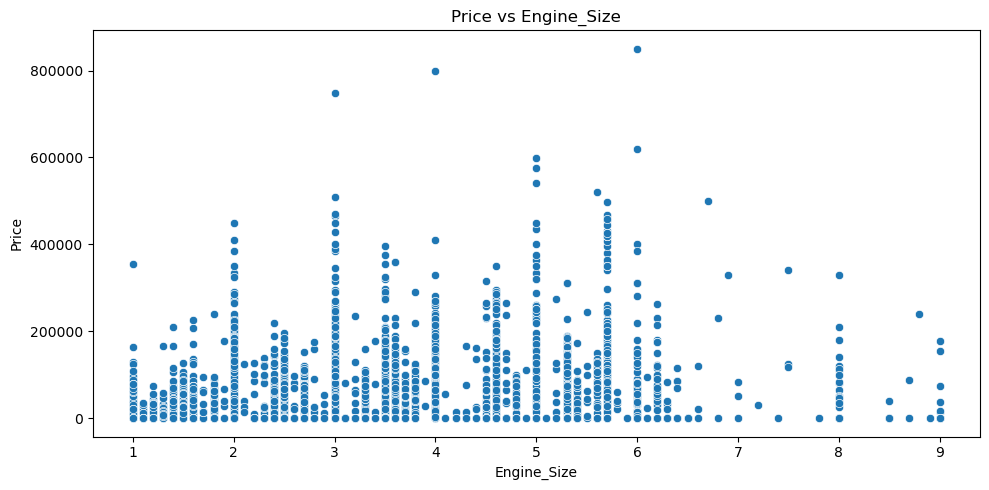

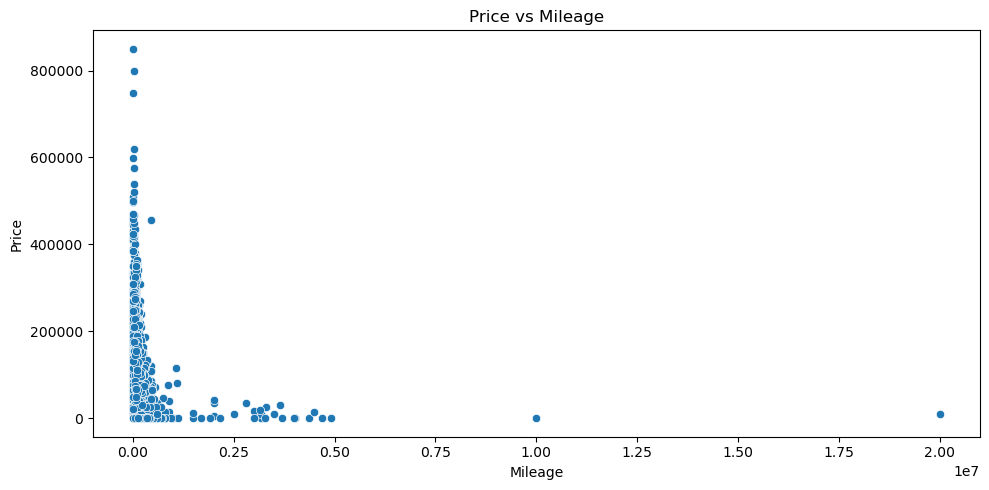

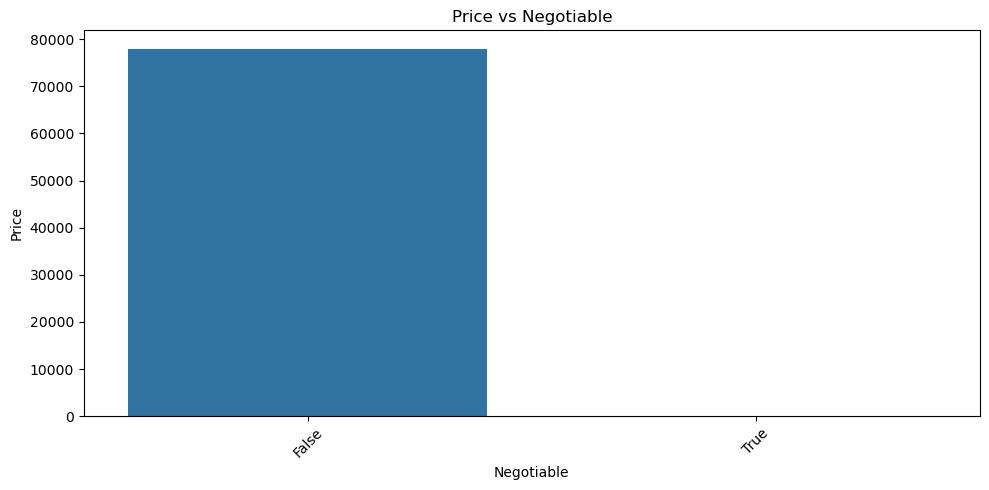

In [76]:
for col in df.columns:
    if col != 'Price':
        plt.figure(figsize=(10, 5))
        if df[col].dtype == 'O' or df[col].dtype == 'bool':
            # categorical or boolean
            sns.barplot(x=col, y='Price', data=df, estimator=np.mean, ci=None)
            plt.xticks(rotation=45)
        else:
            # numeric
            sns.scatterplot(x=col, y='Price', data=df)
        plt.title(f'Price vs {col}')
        plt.tight_layout()
        plt.show()

## Preprocessing

Karena dirasa tidak mungkkin ada data mobil yang berharga 0, maka saya memutuskan untuk menghapus data mobil yang harganya kurang dari sama dengan 0.

In [77]:
jumlah_price_nol = (df['Price'] <= 0).sum()
print("Jumlah data pada kolom Price yang bernilai 0 atau kurang:", jumlah_price_nol)

Jumlah data pada kolom Price yang bernilai 0 atau kurang: 1797


In [78]:
# Hapus baris dengan nilai Price <= 0 dan reset index agar index mengikuti data terbaru
df = df[df['Price'] > 0].reset_index(drop=True)
df.shape

(3827, 11)

In [79]:
# Mengecek jumlah data yang nilainya duplikat
df.duplicated().sum()

3

In [80]:
# Menghapus duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

Text(0.5, 0, 'Price')

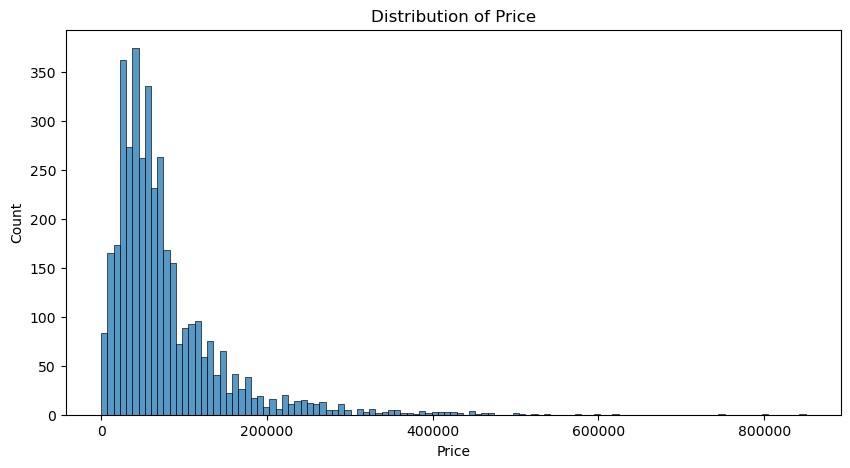

In [81]:
# cek outliers pada kolom Price
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Price'])
plt.title('Distribution of Price')
plt.xlabel('Price')

In [82]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')   

In [83]:
# Mengecek Outlier pada kolom Price
find_anomalies(df['Price'])

IQR: 59250.0
limit_bawah: -53875.0
limit_atas: 183125.0


### Feature engineering

- Price

In [84]:
df['Price'].describe()

count      3824.000000
mean      78019.245031
std       72748.182183
min           1.000000
25%       35000.000000
50%       58000.000000
75%       94250.000000
max      850000.000000
Name: Price, dtype: float64

In [85]:
# Cek price yang lebih dari 183125
df[df['Price'] > 183125].count()['Price']

259

75% data pada kolom *Price* bernilai **94.250 SAR**, dengan nilai maksimal **850.000 SAR**. Sehingga membuat distribusi datanya skewed kanan (*Positive Skewed*). Terdapat 259 data nilai pricenya lebih dari **183.125 SAR** (batas atas berdasarkan IQR).Untuk membuat distribusi datanya tidak skewed lagi, maka data yang di atas batas atas akan dihapus.

In [86]:
df = df[df['Price'] <= 183125].reset_index(drop=True)

Text(0.5, 0, 'Price')

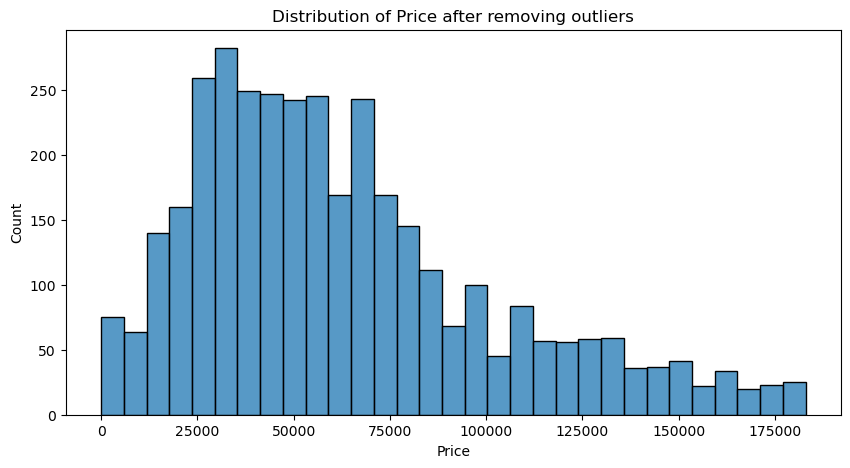

In [87]:
# Distribusi Price setelah menghapus outliers
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Price'])
plt.title('Distribution of Price after removing outliers')
plt.xlabel('Price')

In [88]:
df['Price'].describe()

count      3565.000000
mean      62935.818513
std       39420.569873
min           1.000000
25%       35000.000000
50%       55000.000000
75%       81500.000000
max      183000.000000
Name: Price, dtype: float64

## Define X dan y

In [89]:
# Mendeklarasikan feature variables
X = df.drop(columns=['Price'])
X.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False


In [90]:
#add constant for intercept
X = sm.add_constant(X)
X.head()

,const,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable
0,1.0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False
1,1.0,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False
2,1.0,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False
3,1.0,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False
4,1.0,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False


In [91]:
# target variable
y = df['Price']
y.head()

0    120000
1     42000
2     58000
3     85000
4     48000
Name: Price, dtype: int64

### Encoding

In [92]:
# Tentukan analysis date (misal: tahun data terbaru di df)
analysis_year = df['Year'].max()

# Buat kolom Age sebagai selisih analysis_year dengan Year
X['Age'] = analysis_year - X['Year']

# Drop kolom 'Year' setelah membuat 'Age'
X = X.drop(columns=['Year'])

# Tampilkan beberapa data teratas untuk verifikasi
X[['Age']].head()

,Age
0,7
1,6
2,2
3,9
4,5


In [93]:
# encoder
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Age', 'Engine_Size', 'Mileage', 'Negotiable']),
    ('onehot', OneHotEncoder(), ['Gear_Type', 'Origin', 'Options']),
    ('binary', ce.BinaryEncoder(), ['Make', 'Region', 'Type'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['Age', 'Engine_Size', 'Mileage',
                                  'Negotiable']),
                                ('onehot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary', BinaryEncoder(),
                                 ['Make', 'Region', 'Type'])])

In [94]:
# terapkan transformasi pada X
X_transformed = transformer.fit_transform(X)

### Data splitting

In [95]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

## Modeling

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

# Mencari algoritma terbaik berdasarkan tiap metrics
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:

# Encode categorical variables before fitting OLS
X_encoded = transformer.fit_transform(X)

# Define model using encoded features only
model = sm.OLS(y, X_encoded)

# Fit model
results = model.fit()

# Summary of model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:50:43   Log-Likelihood:                -41643.
No. Observations:                3565   AIC:                         8.335e+04
Df Residuals:                    3535   BIC:                         8.353e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.966e+04    531.910    -36.965      0.0

## Assumption in Linear Regression

Check:
1. Multicollinearity
1. Normality of Residual (error)
1. Gauss-Markov Assumption

In [98]:
df.select_dtypes(include=np.number).corr()

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.285576,-0.172694,0.363713
Engine_Size,-0.285576,1.000000,0.044043,0.303512
Mileage,-0.172694,0.044043,1.000000,-0.118829
Price,0.363713,0.303512,-0.118829,1.000000


**VIF (Variance Inflation Factor)**
- VIF > 4: terjadi multicollinearity
- VIF > 10: terjadi multicollinearity parah

In [99]:
X.head(3)

,const,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Negotiable,Age
0,1.0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,8.0,80000,False,7
1,1.0,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2.4,220000,False,6
2,1.0,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2.0,25000,False,2


In [100]:
X.values

array([[1.0, 'Yukon', 'Riyadh', ..., 80000, False, 7],
       [1.0, 'Optima', 'Hafar Al-Batin', ..., 220000, False, 6],
       [1.0, 'CX3', 'Abha', ..., 25000, False, 2],
       ...,
       [1.0, 'X-Trail', 'Jeddah', ..., 78794, False, 3],
       [1.0, 'Yukon', 'Dammam', ..., 48000, False, 5],
       [1.0, 'RX', 'Dammam', ..., 81000, False, 5]], dtype=object)

In [101]:
len(X.columns)

11

In [102]:
# looping VIF hanya untuk kolom numerik
X_numeric = X.select_dtypes(include=[np.number])
[variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

[6.1394365677160305, 1.0888293850566277, 1.030772347849223, 1.1201231882120535]

In [103]:
# menampilkan VIF dalam dataframe

def calc_vif(X):

    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, kolom) for kolom in range(len(X.columns))]

    return vif

In [104]:
# Gunakan X yang sudah di-encoding dengan transformer untuk VIF calculation

# Buat DataFrame dari X_encoded
feature_names = transformer.get_feature_names_out()
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# Hitung VIF untuk semua kolom kecuali 'remainder__const'
vif_df = calc_vif(X_encoded_df.drop(columns=['remainder__const']))
vif_df.sort_values(by='VIF', ascending=False)

,feature,VIF
4,onehot__Gear_Type_Automatic,inf
5,onehot__Gear_Type_Manual,inf
6,onehot__Origin_Gulf Arabic,inf
7,onehot__Origin_Other,inf
8,onehot__Origin_Saudi,inf
9,onehot__Origin_Unknown,inf
10,onehot__Options_Full,inf
11,onehot__Options_Semi Full,inf
12,onehot__Options_Standard,inf
23,binary__Region_4,1.960109


In [105]:
# Menampilkan VIF untuk semua kolom kecuali kolom yang nama depannya 'Region'
origin_columns = [col for col in X_encoded_df.columns if 'Origin' in col]
options_columns = [col for col in X_encoded_df.columns if 'Options' in col]

# Only drop columns that exist in X_encoded_df
cols_to_drop = origin_columns + options_columns + [col for col in ['remainder__const', 'scaler__Negotiable', 'onehot__Gear_Type_Manual', 'onehot__Gear_Type_Automatic'] if col in X_encoded_df.columns]
vif_df = calc_vif(X_encoded_df.drop(cols_to_drop, axis=1))
vif_df.sort_values(by='VIF', ascending=False)

,feature,VIF
13,binary__Region_4,4.886547
8,binary__Make_5,3.012953
7,binary__Make_4,2.850053
6,binary__Make_3,2.626250
11,binary__Region_2,2.323187
5,binary__Make_2,2.222114
18,binary__Type_4,2.152856
22,binary__Type_8,2.136147
20,binary__Type_6,2.006797
17,binary__Type_3,1.985745


In [106]:
# Hapus kolom yang memiliki VIF tinggi
X = X_encoded_df.drop(columns=cols_to_drop)

In [107]:
X.head(3)

,scaler__Age,scaler__Engine_Size,scaler__Mileage,binary__Make_0,binary__Make_1,binary__Make_2,binary__Make_3,binary__Make_4,binary__Make_5,binary__Region_0,...,binary__Region_4,binary__Type_0,binary__Type_1,binary__Type_2,binary__Type_3,binary__Type_4,binary__Type_5,binary__Type_6,binary__Type_7,binary__Type_8
0,0.4,2.65,-0.205882,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,-0.15,0.823529,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.6,-0.35,-0.610294,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [108]:
y.head()

0    120000
1     42000
2     58000
3     85000
4     48000
Name: Price, dtype: int64

In [109]:
# Modeling ulang
model = sm.OLS(y, X)
model_results = model.fit()

# Summary of the new model
print(model_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              631.8
Date:                Wed, 25 Jun 2025   Prob (F-statistic):                        0.00
Time:                        12:50:44   Log-Likelihood:                         -42136.
No. Observations:                3565   AIC:                                  8.432e+04
Df Residuals:                    3542   BIC:                                  8.446e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## 2. Normality Assumption (Residual atau Error)
Cek apakah error terdistribusi normal atau tidak

In [110]:
# residual = y_actual - y_pred
residual = model_results.resid
residual.head()

0    37629.886964
1    23947.918756
2     4828.245482
3    30232.476985
4    14010.210958
dtype: float64

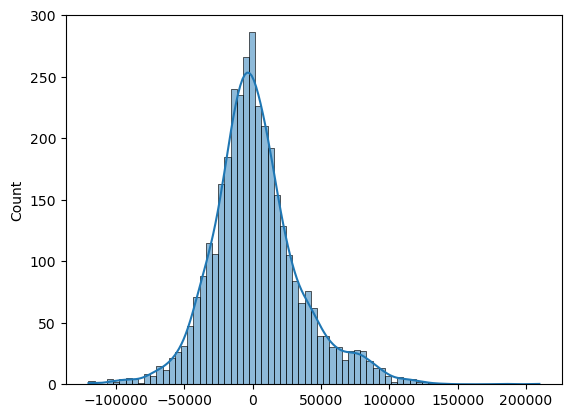

In [111]:
sns.histplot(residual, kde=True);
# residual mendekati terdistribusi normal

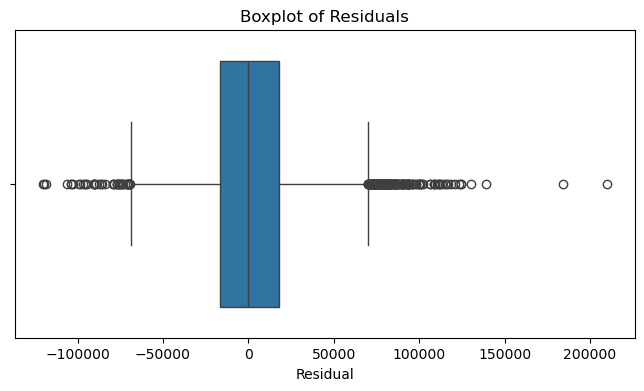

In [112]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=residual)
plt.title('Boxplot of Residuals')
plt.xlabel('Residual')
plt.show()

### 3. Gauss-Markov Assumption
- Rata-rata residual mendekati 0
- Uncorrelated error
- Homoscedasticity (constant variance of error)

In [113]:
# y_pred (nilai tip hasi prediksi model)
y_pred = model_results.predict(X)
y_pred.head()

0    82370.113036
1    18052.081244
2    53171.754518
3    54767.523015
4    33989.789042
dtype: float64

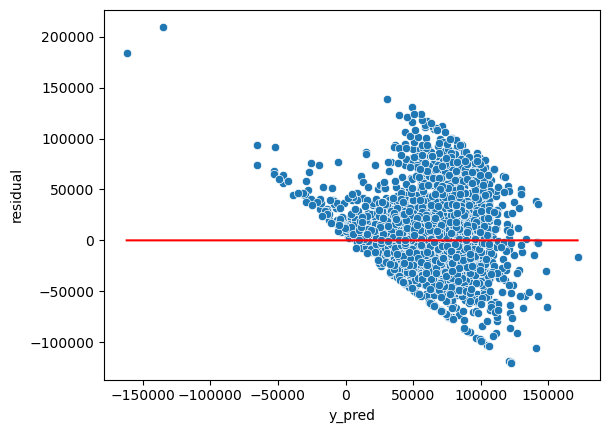

In [114]:
# residual plot (scatterplot y_pred vs residual)

sns.scatterplot(x=y_pred, y=residual)
sns.lineplot(x=y_pred, y=0, color='red')
plt.xlabel('y_pred')
plt.ylabel('residual');

1. Pvalue F-statistic

    - Ho: semua feature tidak berpengaruh signifikan terhadap target
    - Ha: minimal salah satu feature berpengaruh signifikan terhadap target
    - Pvalue=0.00 --> Reject Ho --> minimal salah satu feature berpengaruh signifikan terhadap target
    <br><br>
    
2. Pvalue T-test

    a. B0 (intercept)
    - pvalue=0.000 --> Reject Ho --> Model membutuhkan scaler__Age
    b. B1 (slope engine_size)
    - pvalue=0.000 --> Reject Ho --> scaler__Engine_Size berpengaruh signifikan terhadap Price
    c. B2 (slope mileage)
    - pvalue=0.000 --> Reject Ho --> Scaler__Mileage berpengaruh signifikan terhadap tip <br>
    ...

3. Coef

    a. B0 (intercept) = -1.834e+04
    - ketika semua feature bernilai 0, maka tipnya sebesar -1834 SAR. <br>
    b. B1 (slope engine size) = 2.454e+04
    - ketika engine sizenya naik 1, maka tipnya naik 2454 SAR
    c. B2 (slope mileage) = -563.4903 <br>
    - ketika mileagenya bertambah 1, maka rata-rata tipnya lebih besar -563.4903 SAR

<br>
4. Adj. R square = 0.804

- Artinya model ini dapat menjelaskan 80.4% variance nilai Price. Sisanya 19.6% dapat dijelaskan oleh feature lain yang
tidak ada dalam model ini.


In [115]:
model_results.params

scaler__Age           -18335.206866
scaler__Engine_Size    24541.972276
scaler__Mileage         -563.490335
binary__Make_0          2296.146898
binary__Make_1         10543.214692
binary__Make_2         10963.810728
binary__Make_3         16159.699873
binary__Make_4         11814.059615
binary__Make_5         -5184.829247
binary__Region_0       -5926.156682
binary__Region_1        2835.844043
binary__Region_2       14802.621352
binary__Region_3       10964.755119
binary__Region_4       31329.932890
binary__Type_0         16726.545385
binary__Type_1          3834.832241
binary__Type_2          8705.324255
binary__Type_3          6412.061377
binary__Type_4           115.655217
binary__Type_5          9373.328598
binary__Type_6         -3487.406930
binary__Type_7          3085.654590
binary__Type_8         -1593.147108
dtype: float64

### Cross Validation

In [116]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [117]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

score_mse = []
nilai_mean_mse = []
nilai_std_mse = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Define the list of models to evaluate
models = [lr, knn, dt, rf, xgb]

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # MSE
    model_cv_mse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_squared_error', 
        error_score='raise'
        )
    
    score_mse.append(model_cv_mse)
    nilai_mean_mse.append(model_cv_mse.mean())
    nilai_std_mse.append(model_cv_mse.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R squared
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())


In [118]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MSE': nilai_mean_mse[:5],
    'Std_MSE': nilai_std_mse[:5],
    'Mean_RMSE': nilai_mean_rmse[:5],
    'Std_RMSE': nilai_std_rmse[:5],
    'Mean_MAE': nilai_mean_mae[:5],
    'Std_MAE': nilai_std_mae[:5],
    'Mean_MAPE': nilai_mean_mape[:5],
    'Std_MAPE': nilai_std_mape[:5],
    'Mean_R2': nilai_mean_r2[:5],
    'Std_R2': nilai_std_r2[:5]
})

,Model,Mean_MSE,Std_MSE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-9.489701e+08,8.746018e+07,-30772.080386,1431.489259,-21616.049452,925.055673,-44.111937,85.434657,0.396998,0.072766
1,KNN Regressor,-6.342785e+08,2.353548e+07,-25180.540407,467.875718,-17364.604970,500.679349,-34.802698,67.083203,0.597405,0.028729
2,DecisionTree Regressor,-9.516825e+08,8.825626e+07,-30816.383059,1425.859652,-19040.074148,1178.375638,-61.227050,120.047317,0.395372,0.071630
3,RandomForest Regressor,-5.085139e+08,5.363405e+07,-22517.713067,1210.988101,-14291.586459,677.838328,-60.490901,118.579482,0.677197,0.039605
4,XGBoost Regressor,-4.902249e+08,4.363791e+07,-22118.157031,1005.971278,-13949.607617,482.758064,-57.553597,112.809975,0.688795,0.034114


Berdasarkan hasil Cross Validation, dan metrix diatas, terlihat model terbaik yang terbaik untuk diterapkan adalah **XGBoost** (RMSE dan untuk R2_Scorenya memiliki nilai terbesar (**68.87%**))

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

In [119]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    # 'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2_Scroe': score_r2}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R2_Scroe
XGB,20047.351945,12929.953125,0.952999,0.729944


Dari data di atas, terlihat jika XGB adalah yang terbaik performanya.

## Hyperparameter tuning

In [120]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [121]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions=hyperparam_space_xgb,
    n_iter=50,
    cv=crossval,
    scoring=[
        'neg_root_mean_squared_error',
        'neg_mean_absolute_error',
        'neg_mean_absolute_percentage_error',
        'r2'
    ],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state=1
)

In [122]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               ['Age',
                                                                                'Engine_Size',
                                                                                'Mileage',
                                                                                'Negotiable']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Make',
                                                                                'Region',
                                                                                'Type'])]...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error', 'r2'])

In [123]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
17,0.196447,0.017405,0.020129,0.002422,0.6,0.001000,190,5,0.04,9,...,115.252629,30,0.724429,0.727187,0.698715,0.667766,0.749742,0.713568,0.028037,1
7,0.340534,0.012627,0.022899,0.000861,0.9,0.059948,119,8,0.05,5,...,103.375369,20,0.717300,0.718449,0.685036,0.670966,0.758601,0.710070,0.030442,2
20,0.123608,0.011268,0.018228,0.002069,0.9,0.007743,143,4,0.38,6,...,114.352230,28,0.698659,0.708374,0.687983,0.627682,0.709660,0.686472,0.030412,3
22,0.134142,0.013985,0.019834,0.002210,0.7,0.002783,155,4,0.25,8,...,116.735919,33,0.703415,0.685356,0.678681,0.657569,0.706284,0.686261,0.017757,4
24,0.128080,0.009341,0.019045,0.001415,0.9,10.000000,146,4,0.06,5,...,108.272795,24,0.703200,0.686565,0.670935,0.649125,0.714651,0.684895,0.023228,5
3,0.290376,0.019939,0.023446,0.002523,0.5,0.021544,166,8,0.10,9,...,102.808738,19,0.667421,0.703178,0.672348,0.638345,0.692624,0.674783,0.022416,6
23,0.132297,0.013253,0.018332,0.002385,0.9,3.593814,153,4,0.33,9,...,115.447017,31,0.670393,0.666037,0.676082,0.620254,0.709841,0.668521,0.028649,7
8,0.202590,0.008194,0.021550,0.004130,0.7,0.021544,182,6,0.31,2,...,138.934091,44,0.637833,0.639379,0.705916,0.618268,0.734640,0.667207,0.044895,8
42,0.156931,0.012755,0.021602,0.002972,0.3,3.593814,118,6,0.18,6,...,106.773894,23,0.677338,0.669373,0.634362,0.610940,0.698393,0.658081,0.031331,9
16,0.139175,0.016742,0.018637,0.001831,0.8,0.166810,190,3,0.48,9,...,102.665751,18,0.675350,0.686014,0.643878,0.583381,0.667124,0.651149,0.036611,10


In [124]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -21231.689453125
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [125]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
score_r2 = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({ 'RMSE': rmse_xgb_tuning, 
                                    'MAE': mae_xgb_tuning, 
                                    'MAPE': mape_xgb_tuning,
                                    'R2_Score': score_r2},
                                     index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2_Score
XGB,19753.863825,12926.463867,1.016017,0.737793


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [126]:
# Gabungkan skor sebelum dan sesudah tuning dalam satu dataframe
# Perbaiki nama kolom 'R2_Scroe' menjadi 'R2_Score' di score_before_tuning
score_before_tuning_fixed = score_before_tuning.rename(columns={'R2_Scroe': 'R2_Score'})

comparison = pd.concat([
    score_before_tuning_fixed[['RMSE', 'MAE', 'MAPE', 'R2_Score']].rename(index={'XGB': 'Before Tuning'}),
    score_after_tuning.rename(index={'XGB': 'After Tuning'})
])
comparison

,RMSE,MAE,MAPE,R2_Score
Before Tuning,20047.351945,12929.953125,0.952999,0.729944
After Tuning,19753.863825,12926.463867,1.016017,0.737793


Model mengalami peningkatan perfoma (RMSE, MSE, MAPE) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 20047, 12929, 0.95
- RMSE, MAE & MAPE setelah tuning: 19753, 12926, 1.01

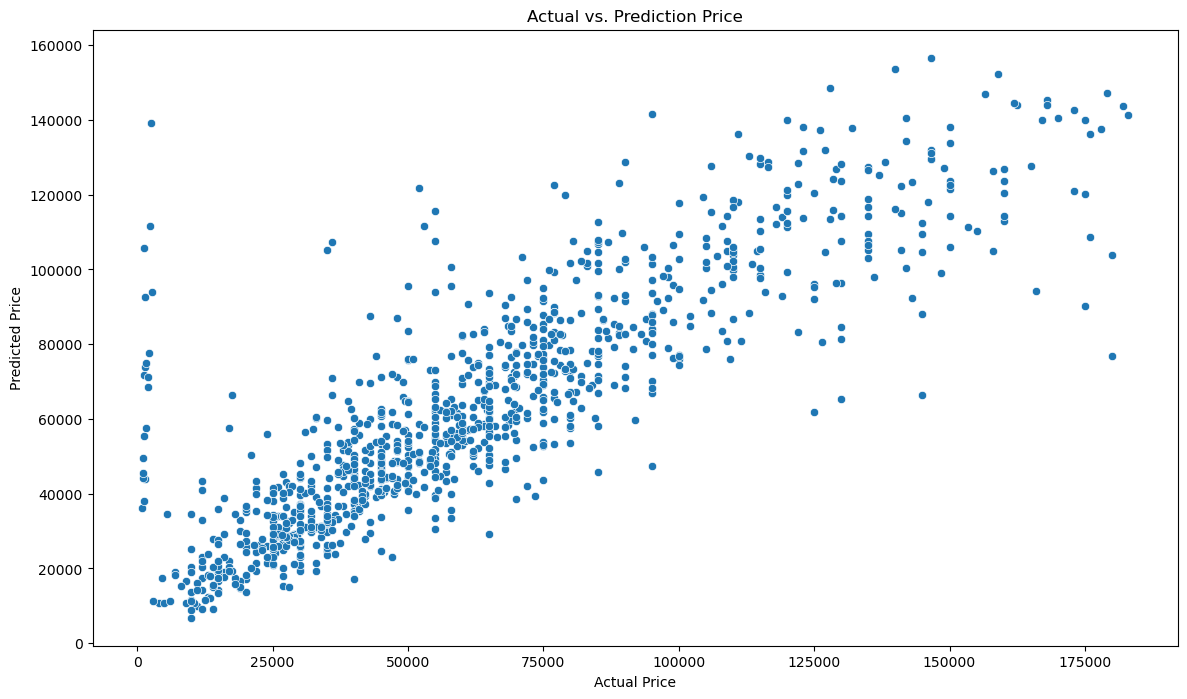

In [127]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Ringkasan scatterplot Actual vs. Predicted Price

- Scatterplot pada cell sebelumnya membandingkan harga aktual (y_test) dengan harga prediksi model XGBoost setelah tuning (y_pred_xgb_tuning).
- Titik-titik yang tersebar di sekitar garis diagonal (y = x) menunjukkan prediksi model mendekati nilai aktual.
- Jika titik-titik banyak tersebar di bawah atau di atas garis, berarti model sering underpredict atau overpredict.
- Pada plot ini, sebagian besar titik berada cukup dekat dengan garis diagonal, menandakan model cukup baik dalam memprediksi harga mobil bekas.
- Namun, masih terdapat beberapa outlier, terutama pada harga tinggi, yang menunjukkan prediksi model kurang akurat pada kasus ekstrem.
- Secara umum, model XGBoost dengan tuning sudah memberikan hasil prediksi yang cukup baik dan konsisten untuk sebagian besar data.

<Axes: title={'center': 'Feature Importances'}>

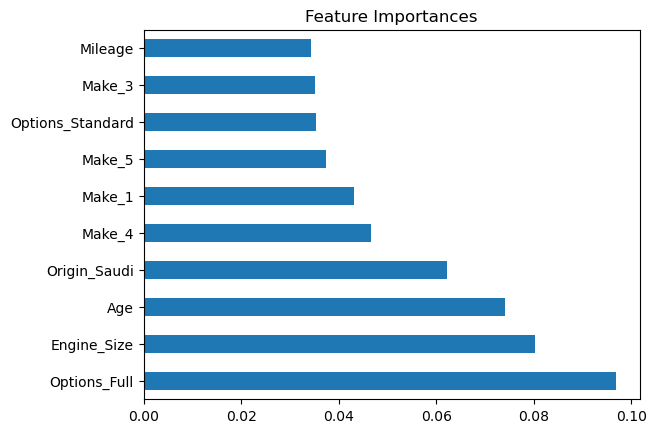

In [128]:
# Plot feature importances

# Get feature names after transformation
feature_names = []
for name, trans, cols in transformer.transformers_:
	if name == 'remainder' and trans == 'passthrough':
		# passthrough columns
		passthrough_cols = [c for c in X_train.columns if c not in sum([list(c) if isinstance(c, list) else [c] for _, _, c in transformer.transformers_ if _ != 'remainder'], [])]
		feature_names.extend(passthrough_cols)
	elif hasattr(trans, 'get_feature_names_out'):
		# transformers with get_feature_names_out
		if hasattr(trans, 'categories_'):  # OneHotEncoder
			feature_names.extend(trans.get_feature_names_out(cols))
		else:
			feature_names.extend(trans.get_feature_names_out())
	elif hasattr(trans, 'get_feature_names'):
		feature_names.extend(trans.get_feature_names())
	elif isinstance(cols, list):
		feature_names.extend(cols)
	else:
		feature_names.append(cols)

# Convert to string if needed
feature_names = [str(f) for f in feature_names]

# Get feature importances from the XGBRegressor in the pipeline
importances = xgb_tuning.named_steps['model'].feature_importances_

# Plot top 10 feature importances
feature_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
feature_imp.plot(kind='barh', title='Feature Importances')

## Conclusion

Berdasarkan analisis dan pemodelan yang telah dilakukan, model XGBoost dengan hyperparameter tuning memberikan performa terbaik dalam memprediksi harga mobil bekas pada dataset ini. Model mampu menjelaskan variasi harga dengan cukup baik, terbukti dari nilai RMSE, MAE, dan MAPE yang relatif rendah setelah tuning. Fitur-fitur yang paling berpengaruh terhadap prediksi harga antara lain adalah `Options_Full`, `Engine_Size`, `Age`, dan `Origin_Saudi`, serta beberapa kategori dari fitur `Make`.

## Recommendation

1. **Penggunaan Model**: Platform jual beli mobil bekas dapat mengimplementasikan model XGBoost ini sebagai alat bantu penentuan harga yang adil dan transparan bagi penjual maupun pembeli.
2. **Fitur Penting**: Fitur-fitur seperti `Options`, `Engine_Size`, dan `Age` sebaiknya selalu diisi dengan benar oleh pengguna karena sangat memengaruhi hasil prediksi harga.
3. **Data Quality**: Pastikan data yang diinput ke sistem selalu bersih, tidak ada outlier ekstrem, dan tidak ada duplikasi agar model tetap akurat.
4. **Continuous Improvement**: Lakukan retraining model secara berkala dengan data terbaru agar model tetap relevan dengan kondisi pasar.
5. **Explainability**: Manfaatkan tools explainable AI (seperti SHAP/LIME) untuk memberikan insight kepada pengguna mengenai faktor-faktor utama yang memengaruhi harga prediksi, sehingga meningkatkan kepercayaan pengguna terhadap sistem.

Dengan penerapan rekomendasi di atas, diharapkan platform dapat meningkatkan kepercayaan pengguna dan mendorong lebih banyak transaksi yang adil dan transparan.

## Explainable AI

In [129]:
import shap

### Shap seluruh dataframe

In [130]:
# best model
xgb_best = random_xgb.best_estimator_
xgb_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Age', 'Engine_Size',
                                                   'Mileage', 'Negotiable']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Make', 'Region',
                                                   'Type'])])),
                ('scaler', RobustScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=Non...
                              feature_types=None, feature_weights=None, gamma=9,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.04,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=190, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [131]:
# ambil model dan data dari pipeline
my_model = xgb_tuning[-1]
my_data = xgb_tuning[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model=my_model,
    data=my_data,
    # feature_dependence='independent',
    # model_output='probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

In [132]:
# ambil nama feature
feat_scale = xgb_tuning['preprocessing'].transformers_[0][2]
feat_onehot = list(xgb_tuning['preprocessing'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(xgb_tuning['preprocessing'].transformers_[2][2])

feat = feat_scale + feat_onehot + feat_remainder
feat

['Age',
 'Engine_Size',
 'Mileage',
 'Negotiable',
 'Gear_Type_Automatic',
 'Gear_Type_Manual',
 'Origin_Gulf Arabic',
 'Origin_Other',
 'Origin_Saudi',
 'Origin_Unknown',
 'Options_Full',
 'Options_Semi Full',
 'Options_Standard',
 'Make',
 'Region',
 'Type']

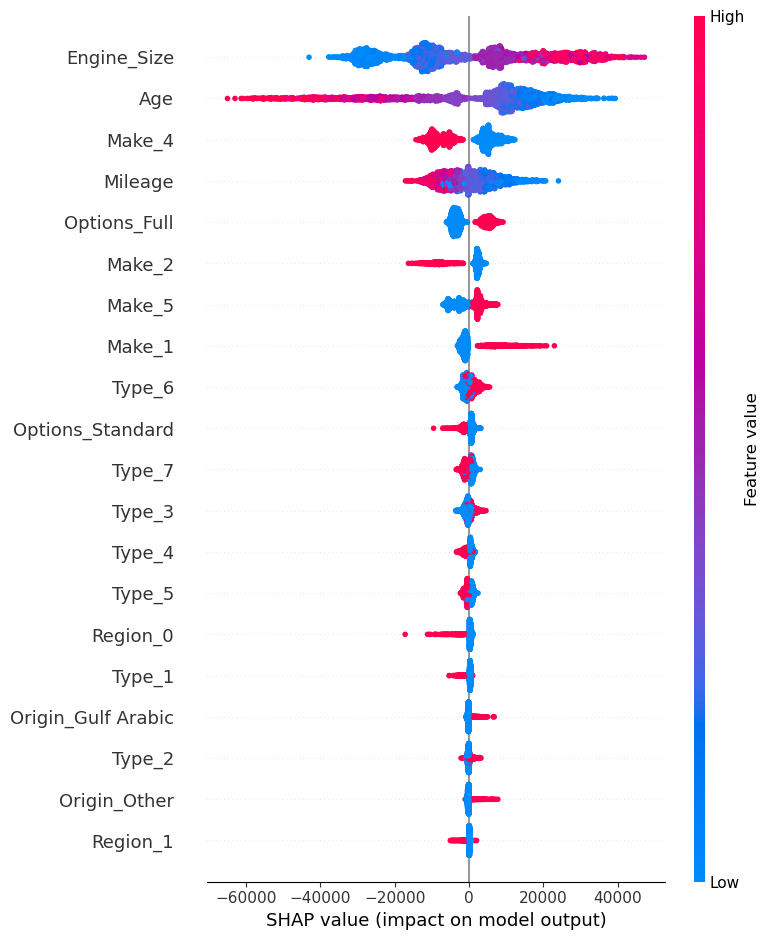

In [133]:
# tampilkan dalam bentuk plot
shap.summary_plot(shap_values, my_data, feature_names=feature_names)

### SHAP untuk satu data point

In [134]:
X_test.iloc[[154]]

,const,Type,Region,Make,Gear_Type,Origin,Options,Engine_Size,Mileage,Negotiable,Age
3108,1.0,Carnival,Jeddah,Kia,Automatic,Saudi,Standard,3.3,200,False,1


In [135]:
y_test.iloc[[154]]

3108    106000
Name: Price, dtype: int64

In [136]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [137]:
# hanya menerima bentuk dataframe
X_test_prep = pd.DataFrame(xgb_tuning[0].transform(X_test), columns=feature_names)

In [138]:
# import init js untuk menampilkan plot
shap.initjs()

In [139]:
# Tampilkan harga aktual dan prediksi untuk data ke-100
idx = 100
actual_price = y_test.iloc[idx]
predicted_price = my_model.predict(X_test_prep.iloc[[idx]])[0]
print(f"Harga aktual mobil ke-{idx}: {actual_price}")
print(f"Harga yang diprediksi model: {predicted_price:.2f}")

shap_plot(
    index=idx,
    model=my_model,
    dataframe=X_test_prep
)

Harga aktual mobil ke-100: 22000
Harga yang diprediksi model: 23950.94


- Fitur di urutan teratas (Options_Full, Engine_Size, Age) adalah yang paling berpengaruh pada prediksi harga mobil.

### LIME 

In [140]:
import lime
from lime import lime_tabular

In [141]:
# define explainer for regression with correct feature names
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=my_data,
    feature_names=feature_names,
    mode='regression'
)

In [142]:
df_prep = pd.DataFrame(xgb_tuning[0].transform(X_test), columns=feature_names)

The prediction must predict this car's price is: 30000 (This is from y_test)
The predicted price by the model: 38168.43


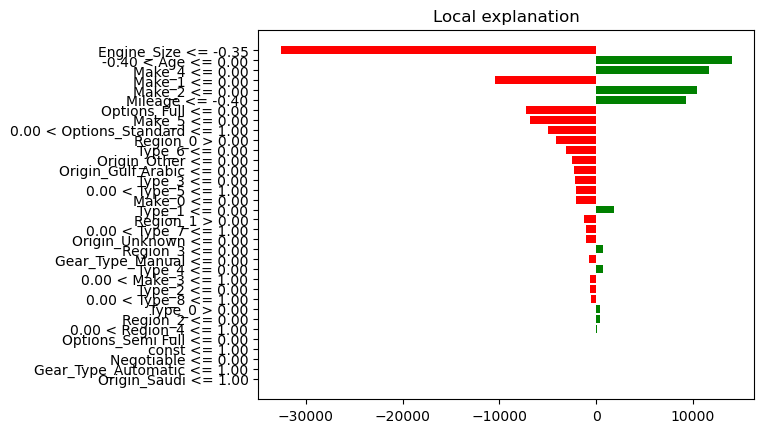

In [143]:
# Define the index of the customer you want to inspect
index_customer = 190  # Change this to any valid index (0 to 1069)

# Show the actual and predicted price for the selected customer
print(f"The prediction must predict this car's price is: {y_test.iloc[index_customer]} (This is from y_test)")
print(f"The predicted price by the model: {my_model.predict(X_test_prep.iloc[[index_customer]])[0]:.2f}")

# explain to 1 row
exp = explainer_lime.explain_instance(
    data_row=X_test_prep.iloc[index_customer],
    predict_fn=my_model.predict,
    num_features=len(feature_names)
)

fig = exp.as_pyplot_figure()
plt.show()

In [144]:
# Compare with the real result
print(f"The prediction must predict this car's price is: {y_test.iloc[10]} --> from y_test")

exp = explainer_lime.explain_instance(
    data_row=X_test_prep.iloc[index_customer],
    predict_fn=my_model.predict
)

exp.show_in_notebook(show_table=True)

The prediction must predict this car's price is: 43000 --> from y_test
